<H1 style="text-align: center;">良いプログラムを書くために</H1>
<br><br><br><br><br><br><br><br>
<div style="text-align: right;">
株式会社コンテック<br>
若松 次男
<div>
    


# 目次
- 目的
- 開発環境構築
- 良いプログラムとは
- バージョン管理
- TIPS

# 目的

# 卒論を書くには
  
- IMRaD形式による論文
    - Introduction :What are you studying and why?(何を研究したのか？、何故それを研究したのか)
    - Methods :What did you do?（具体的には何をしたのか？）
    - Results :What did you find?（何がわかったのか?）
    - Discussion :What do your findings mean?(あなたが見つけたことは何を意味するのか？)
    - Conclusion :What have you learned from the study?(この研究を通じて得られたものは？)
- Title, Abstract, Conclusion

参考サイト：Wikipedia - IMRAD (https://ja.wikipedia.org/wiki/IMRAD)

# 研究のサイクル
  
  
1. 先行研究の調査
2. データの収集
3. プログラムの開発・修正
4. プログラムの実行
5. 考察

# 開発環境構築

# プログラミングの準備
  
- プログラミング言語選定
    - python, julia, C++, Rust
- 環境選定 (python)
    - anaconda
    - jupyter notebook
    - jupyter lab
    - visual studio code
    - visual studio

# pythonインストール
## Anaconda
  
- 複数環境の使い分けが可能（データ分析、機械学習、etc.）
- jupyter notebook，jupyter labが使える
- Visual Studio Codeがインストールできる

# ライブラリインストール
## pip install
- pythonライブラリの標準インストーラー

## conda install
- anacondaでのインストーラー

### 参考サイト
- python Package Index (https://pypi.org/)  
- Anaconda Cloud (https://anaconda.org/anaconda/repo)

# 開発環境


## Jupyter Notebook
- 小規模なプログラムを手軽に実行できる


## Jupyter Lab
- Jupyter Notebookの高機能版
- ただし、matplotlibはinlineしか使えない
- CSVファイルや画像ファイルを直接開いてみることができる
  
※ 小さいプログラムやテストプログラムを作るときに利用する。

## Visual Studio Code
- Anacondaからインストール可能（Anaconda用extensionも自動的にインストールされる）

## Visual Studio
- VS2017以降でpythonが利用可能になった

※ 大規模プログラムや継続的に開発を行う利用する。

# 良いプログラムを書くために

# 良いプログラムとは
- きちんと動く (安全性)
- 変更のしやすさ（柔軟性＝疎結合＋高凝集）
- 読みやすさ（可読性）
- 速度

※ 可読性が高ければ、その他の変更がしやすい

プログラムの種類によって重視すべき点は変わるが、どれかを軽視してはいけない

# 安全性確保
- assertを使おう
    - 関数の引数に関する条件を入り口でチェック
    - 入力範囲、入力タイプ(配列の次元、数値、文字、ブール値)

# 変更を容易にする
- 変数のスコープはなるべく小さく
    - パブリック変数よりプライベート変数
    - プライベート変数よりローカル変数
- 関数の引数は必要最小限に

# 可読性を上げる
- 変数や関数等の名前に情報を追加する
- コメントすべきことを知る
- 巨大な式を分割する

参考文献：リーダブルコード (https://www.oreilly.co.jp/books/9784873115658/)

# リファクタリング
- 処理内容を変えずに、品質（可読性、柔軟性）の向上する変更は進んでやろう
    - 速度については必要になってから考えよう
- バージョン管理システムを利用しよう

# 高速化を意識しよう
- numpy, scipy (CおよびFortranにより処理が最適化されている)
- pandas (データ分析・前処理向き)
- cython (汎用的用途での高速化)
- multiprocessing (CPUの複数コアを有効活用)
- gpuを使ったライブラリ (cupy, gpu向けtensorflow, etc.)
<br><br>
※ 最後の2つは、CPUやGPUを有効活用するための前処理や後処理での負荷が大きいため場合によって遅くなることがある

# numpyを使おう
- 連結、結合、分割、削除
- スライス
- 多次元配列演算
- 線形代数演算

In [1]:
import numpy as np

a1 = np.array([[1, 2, 3],
               [4, 5, 6]])
a2 = np.array([[7, 8, 9],
               [0, 11, 12]])

print(np.concatenate([a1, a2], axis=0))

print(np.concatenate([a1, a2], axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [ 0 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6  0 11 12]]


In [2]:
import numpy as np
import time

start = time.time()

a = np.array(range(10000000))
# longのままだとoverflowが発生するため
a = a.astype(np.longlong)
print(a)
sum = 0
for i in a:
    sum += i
print(sum)

end = time.time()
print(f"loop process_time：{end-start}")

[      0       1       2 ... 9999997 9999998 9999999]
49999995000000
loop process_time：3.373105525970459


In [3]:
start = time.time()
print(a.sum())
end = time.time()
print(f"numpy process_time：{end-start}")

49999995000000
numpy process_time：0.009972095489501953


# matplotlibを使おう
- グラフ表示（折れ線、散布図、ヒストグラム）
- 画像表示
- 他にもグラフライブラリとしてBokeh、Seaborn等がある

(array([  3.,   6.,  46., 129., 214., 267., 206.,  94.,  27.,   8.]),
 array([12.74472998, 19.70593985, 26.66714972, 33.62835959, 40.58956946,
        47.55077933, 54.5119892 , 61.47319907, 68.43440895, 75.39561882,
        82.35682869]),
 <a list of 10 Patch objects>)

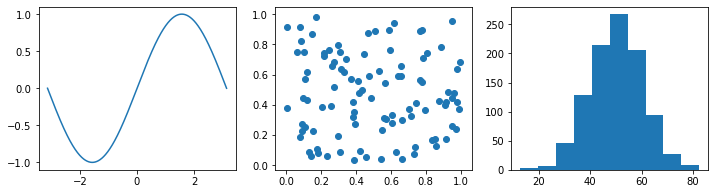

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

t = np.linspace(-np.pi, np.pi, 1000)
x1 = np.sin(t)
ax1.plot(t, x1)

x = np.random.rand(100)
y = np.random.rand(100)
ax2.scatter(x,y)


x = np.random.normal(50, 10, 1000)
ax3.hist(x)

# バージョン管理

# バージョン管理システムとは
- ソースコードの履歴管理を行う
- ファイルの作成日時、変更日時、変更点などの履歴を保管する
- 複数の人間が同一ファイルを編集した際に発生する競合を解決する仕組みを提供する

# バージョン管理ツールをなぜ使うのか
- 以前の状態に戻せる
- 変更履歴を調査する
- 変更理由を知る
- 同一ファイルへの複数人の編集を管理する
- リファクタリングへの抵抗が減る

# バージョン管理システム
- バージョン管理システムには分散型と集中型の2つのタイプがある
- 分散型はローカルでのコミットが可能なため使いやすい
- 分散型にはGitとMercurial、集中型にはSubversionがある
- Gitを使おう

# TIPS

# 研究しよう

- アイデアをプログラムで実装する力をつける
- 良いアイデアを得るためには時間がかかる
- 長期的には常に問題を考えつづける
- 短期的にはメリハリをつけていろんなことをやってみる